In [1]:
import gym

import torch
import torch.autograd as autograd 

from dqn_replay import ReplayBuffer
from dqn_utils import epsilon_greedy, plot
from dqn_training import training, training_atari

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/aravindkotikelapudi/opt/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h3>Use Cuda</h3>

In [2]:
USE_CUDA = torch.cuda.is_available()
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)

<h2>Replay Buffer and Epsilon greedy imports</h2>

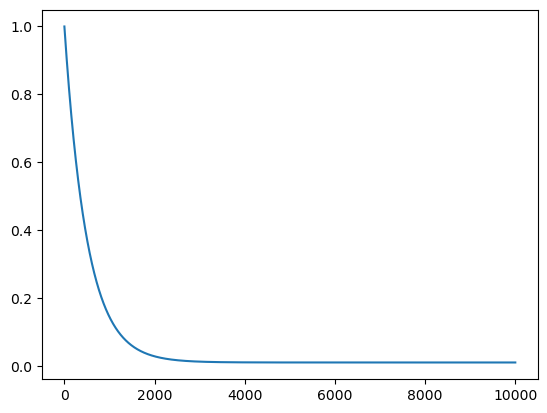

In [3]:
epsilon_greedy().plot()

<h2>Cart Pole Environment</h2>

In [4]:
env_id = "CartPole-v0"
env = gym.make(env_id)

<h2>Instantiating Deep Q Network</h2>

In [5]:
train_instantiate = training(environment=env, Variable=Variable, USE_CUDA=USE_CUDA)

<h2>Training</h2>

In [6]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(log_dir='tests')

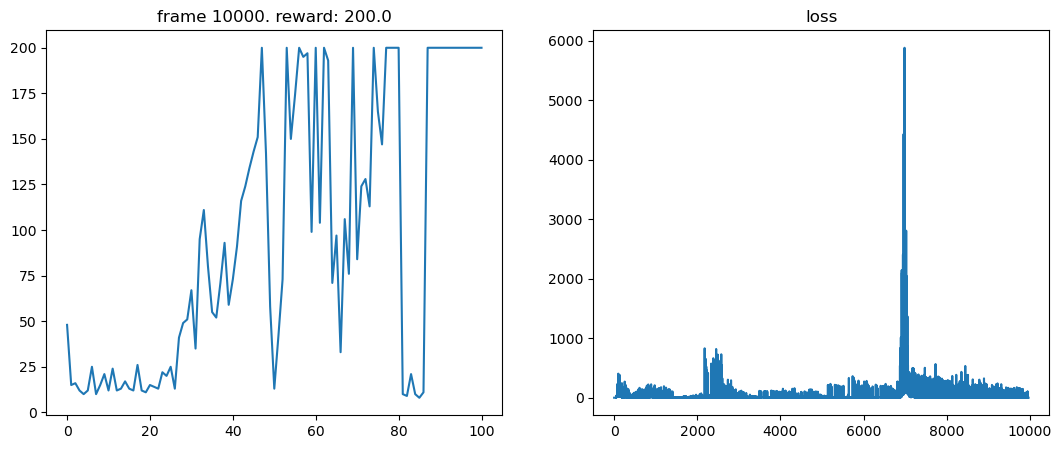

In [6]:
train_instantiate.training_loop(num_frames = 10000, batch_size=32, tensorboard=False)

<p><hr></p>

<h1>Atari Environment</h1>

In [7]:
from common.wrappers import make_atari, wrap_deepmind, wrap_pytorch

In [8]:
import torch.optim as optim

import torch.nn.functional as F
import torch

%matplotlib inline

In [9]:
env_id = "PongNoFrameskip-v4"
env    = make_atari(env_id)
env    = wrap_deepmind(env)
env    = wrap_pytorch(env)

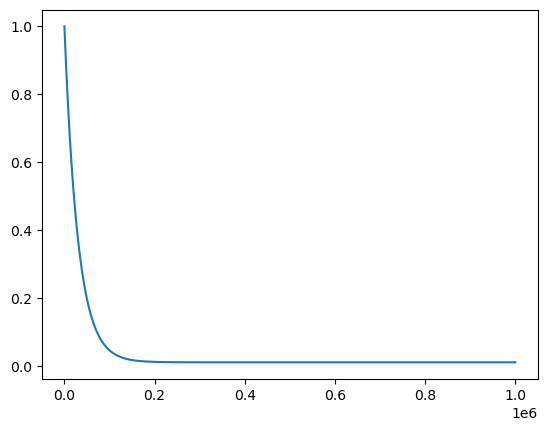

In [10]:
epsilon_greedy(epsilon_decay=30000).plot(plot_range=1000000)

In [11]:
atari_instantiate = training_atari(environment=env, Variable=Variable,
                                    USE_CUDA=USE_CUDA)

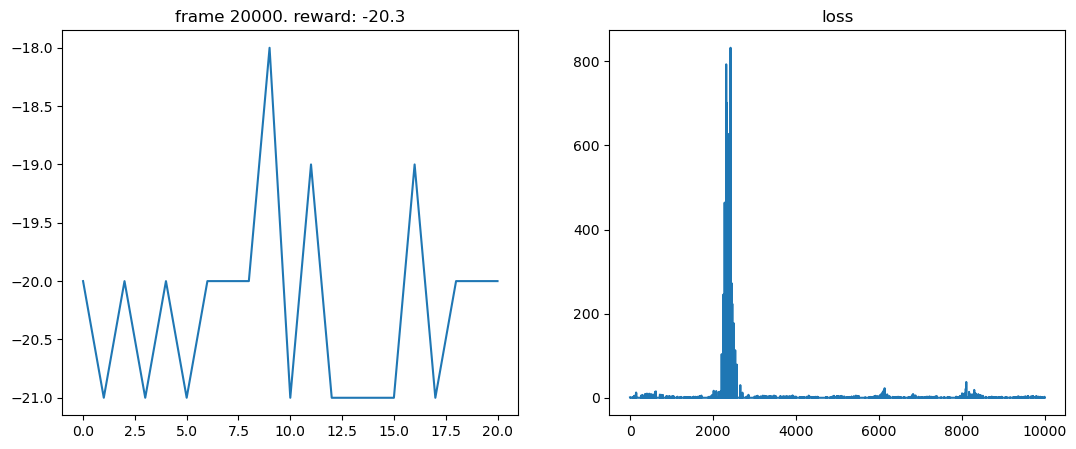

KeyboardInterrupt: 

In [12]:
atari_instantiate.training_loop(num_frames=1400000, batch_size=32, tensorboard=False)

## Training Rewards and Losses 

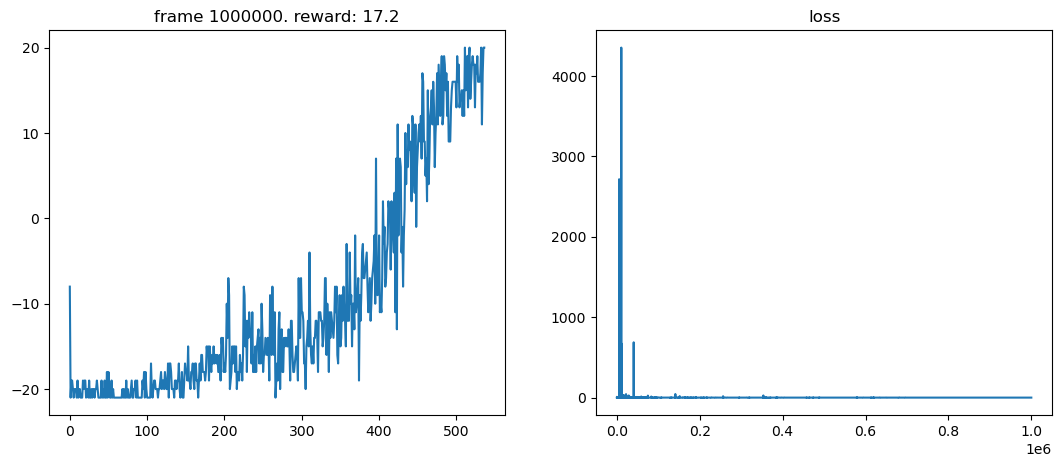

: 

: 

In [23]:
#This is what the training rewards and losses should look like